In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from scipy import stats

print ('Libraries loaded succesfully')

Libraries loaded succesfully


In [ ]:
# Import Dataset
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

## **Data Preparation**

In [ ]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
df.shape

(2864, 21)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2864,179,Turkiye,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,2864,9,Africa,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2864.0,NaN,NaN,NaN,2007.5,4.610577,2000.0,2003.75,2007.5,2011.25,2015.0
Infant_deaths,2864.0,NaN,NaN,NaN,30.363792,27.538117,1.8,8.1,19.6,47.35,138.1
Under_five_deaths,2864.0,NaN,NaN,NaN,42.938268,44.569974,2.3,9.675,23.1,66.0,224.9
Adult_mortality,2864.0,NaN,NaN,NaN,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,NaN,NaN,NaN,4.820882,3.981949,0.0,1.2,4.02,7.7775,17.87
Hepatitis_B,2864.0,NaN,NaN,NaN,84.292598,15.995511,12.0,78.0,89.0,96.0,99.0
Measles,2864.0,NaN,NaN,NaN,77.344972,18.659693,10.0,64.0,83.0,93.0,99.0
BMI,2864.0,NaN,NaN,NaN,25.032926,2.193905,19.8,23.2,25.5,26.4,32.1


In [ ]:
df["Status"] = df["Economy_status_Developed"].apply(lambda x: "Developed" if x == 1 else "Developing")

In [ ]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [ ]:
df.nunique()

Country                         179
Region                            9
Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
dtype: int64

In [ ]:
life_year = df.groupby(by = ['Year', 'Status']).mean().reset_index()

Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_white"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['Life_expectancy'],
                    mode='lines',
                    name='Developing'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['Life_expectancy'],
                    mode='lines',
                    name='Developed'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()

<ipython-input-72-13268cfb4a35>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
filtered_df = df[(df['Year'] >= 2000) & (df['Year'] <= 2015) & ((df['Economy_status_Developed'] == 1) | (df['Economy_status_Developing'] == 1))]

average_life_expectancy_developed = filtered_df.loc[filtered_df['Economy_status_Developed'] == 1, 'Life_expectancy'].mean()
average_life_expectancy_developing = filtered_df.loc[filtered_df['Economy_status_Developing'] == 1, 'Life_expectancy'].mean()

print("Average life expectancy from 2000 to 2015")
print("Developed countries:", average_life_expectancy_developed)
print("Developing countries:", average_life_expectancy_developing)

Average life expectancy from 2000 to 2015
Developed countries: 78.50574324324323
Developing countries: 66.34172535211268


In [ ]:
# Calculate the count of each country status
status_counts = df[["Country","Status"]].drop_duplicates()["Status"].value_counts()

bar_chart = go.Figure(data=[go.Bar(
    x=status_counts.index,
    y=status_counts.values,
    marker=dict(color=['#1f77b4', '#ff7f0e']),
)])
bar_chart.update_layout(
    title='Count Country Status (Bar Chart)',
    xaxis_title='Country Status',
    yaxis_title='Count',
)

pie_chart = go.Figure(data=[go.Pie(
    labels=status_counts.index,
    values=status_counts.values,
    marker=dict(colors=['#1f77b4', '#ff7f0e']),
)])
pie_chart.update_layout(
    title='Count Country Status (Pie Chart)',
)

bar_chart.show()
pie_chart.show()

In [ ]:
fig = px.box(df, x='Region', y='Life_expectancy', color='Region',
             title='Life Expectancy by Region')

fig.update_layout(xaxis=dict(title=None),
                  yaxis=dict(title='Life Expectancy'),
                  xaxis_tickangle=-55,
                  showlegend=False,
                  width=1000,
                  height=800)
# Show the plot
fig.show()

In [ ]:
summary_df = df.groupby('Region')['Life_expectancy'].agg(['mean', 'median', 'min', 'max'])

print(summary_df)

                                    mean  median   min   max
Region                                                      
Africa                         57.847304   57.05  39.4  76.1
Asia                           69.454861   68.85  55.8  83.8
Central America and Caribbean  72.437500   72.60  57.1  79.6
European Union                 77.715046   78.50  70.3  83.2
Middle East                    73.975446   74.30  60.7  82.2
North America                  77.841667   78.00  74.3  81.9
Oceania                        69.517614   68.45  59.0  82.4
Rest of Europe                 74.525417   74.20  65.0  83.2
South America                  72.780729   73.20  62.5  79.6


In [ ]:

# Calculate the average life expectancy by country
avg_life_expectancy = df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=False)

# Highest
print("Top 10 Countries with Most Life Expectancy")
print("="*50)
print(avg_life_expectancy.head(10))

# Lowest
print("\nTop 10 Countries with Least Life Expectancy")
print("="*50)
print(avg_life_expectancy.tail(10))


Top 10 Countries with Most Life Expectancy
Country
Japan          82.45625
Switzerland    81.67500
Iceland        81.57500
Italy          81.38750
Australia      81.11250
Spain          81.10625
Sweden         80.99375
France         80.91250
Israel         80.79375
Canada         80.61250
Name: Life_expectancy, dtype: float64

Top 10 Countries with Least Life Expectancy
Country
Malawi                      52.28750
Cote d'Ivoire               51.95000
Mozambique                  51.88125
Chad                        49.94375
Nigeria                     49.58125
Zimbabwe                    48.66250
Sierra Leone                46.70000
Eswatini                    46.69375
Central African Republic    46.48125
Lesotho                     45.60625
Name: Life_expectancy, dtype: float64


Alcohol vs Life Expectancy


In [ ]:
# Create a scatter plot
fig = px.scatter(df, x='Alcohol_consumption', y='Life_expectancy', trendline='ols')

corr_coeff = df['Alcohol_consumption'].corr(df['Life_expectancy'])

fig.update_layout(
    xaxis_title='Alcohol Consumption',
    yaxis_title='Life Expectancy',
    title='Relationship between Life Expectancy and Alcohol Consumption'
)

fig.show()

print(f"The correlation coefficient between life expectancy and alcohol consumption is: {corr_coeff:.2f}%")

if corr_coeff > 0:
    print("\nThere is a positive relationship between life expectancy and alcohol consumption.")
elif corr_coeff < 0:
    print("\nThere is a negative relationship between life expectancy and alcohol consumption.")
else:
    print("\nThere is no significant relationship between life expectancy and alcohol consumption.")

The correlation coefficient between life expectancy and alcohol consumption is: 0.40%

There is a positive relationship between life expectancy and alcohol consumption.


In [ ]:
predicting_variables = ['Hepatitis_B','Polio', 'Diphtheria', 'Measles']
correlation = df[predicting_variables + ['Life_expectancy']].corr()

sorted_corr = correlation['Life_expectancy'].sort_values(ascending=False)


sorted_corr = sorted_corr.drop('Life_expectancy')

fig = px.bar(x=sorted_corr.index, y=sorted_corr.values, labels={'x': 'Disease', 'y': 'Correlation'},
             title='Impact of Disease on Life Expectancy')

fig.show()

In [ ]:
# columns = ["Status", "Adult_mortality", "Polio", "Diphtheria", "Measles", "Hepatitis_B"]


# fig = px.scatter_matrix(df[columns], dimensions=columns, color="Status",
#                         title="Pair Plot: Status, Adult Mortality, Polio, Diphtheria, Measles, Hepatitis B",
#                         color_discrete_sequence=['orange', 'blue'])


# fig.update_traces(diagonal_visible=False, showupperhalf=False, marker=dict(size=3))
# fig.update_layout(height=600, width=800)


# fig.show()

In [ ]:
# Filter the dataset for each BMI category
bmi_20_25 = df[(df['BMI'] >= 20) & (df['BMI'] <= 25)]
bmi_25 = df[df['BMI'] > 25]
bmi_20 = df[df['BMI'] < 20]


avg_20_25 = bmi_20_25['Life_expectancy'].mean()
avg_25 = bmi_25['Life_expectancy'].mean()
avg_20 = bmi_20['Life_expectancy'].mean()


categories = ['BMI < 20', 'BMI 20 - 25', 'BMI > 25']
avg_life_expectancy = [avg_20, avg_20_25, avg_25]

fig = go.Figure(data=[go.Bar(x=categories, y=avg_life_expectancy, marker_color=['#1f77b4', '#ff7f0e', '#2ca02c'])])
fig.update_layout(
    title='Average Life Expectancy by BMI Category',
    xaxis_title='BMI Categories',
    yaxis_title='Average Life Expectancy',
    font=dict(size=12)
)
fig.show()

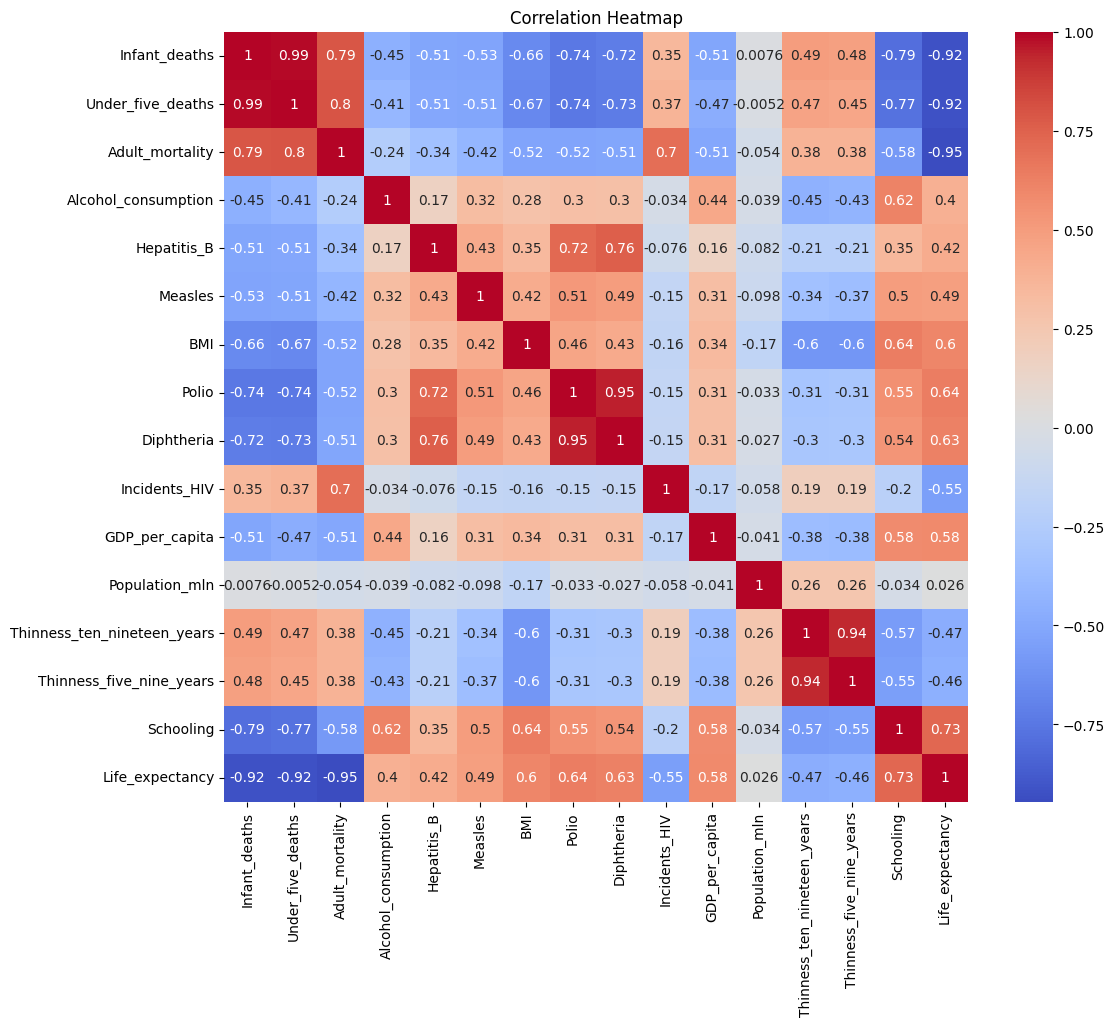

<ipython-input-21-dda496656f17>:25: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Life_expectancy                1.000000
Schooling                      0.732484
Polio                          0.641217
Diphtheria                     0.627541
BMI                            0.598423
GDP_per_capita                 0.583090
Economy_status_Developed       0.523791
Measles                        0.490019
Hepatitis_B                    0.417804
Alcohol_consumption            0.399159
Year                           0.174359
Population_mln                 0.026298
Thinness_five_nine_years      -0.458166
Thinness_ten_nineteen_years   -0.467824
Economy_status_Developing     -0.523791
Incidents_HIV                 -0.553027
Infant_deaths                 -0.920032
Under_five_deaths             -0.920419
Adult_mortality               -0.945360
Name: Life_expectancy, dtype: float64

In [ ]:
corr_matrix = df[["Infant_deaths",
           "Under_five_deaths",
           "Adult_mortality",
           "Alcohol_consumption",
           "Hepatitis_B",
           "Measles",
           "BMI",
           "Polio",
           "Diphtheria",
           "Incidents_HIV",
           "GDP_per_capita",
           "Population_mln",
           "Thinness_ten_nineteen_years",
           "Thinness_five_nine_years",
           "Schooling",
           "Life_expectancy"]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

df.corr()['Life_expectancy'].sort_values(ascending=False)

In [ ]:
high_schooling = df[df['Schooling'] >= 7.8]
low_schooling = df[df['Schooling'] < 7.8]

In [ ]:
t_statistic, p_value = stats.ttest_ind(high_schooling['Life_expectancy'], low_schooling['Life_expectancy'])


In [ ]:
significance_level = 0.05

print(f"t-statistics: {t_statistic}")
print(f"p-value: {p_value}\n")

if p_value < significance_level:
    print("There is a significant difference in life expectancy between countries with high and low levels of schooling.")
else:
    print("There is no significant difference in life expectancy between countries with high and low levels of schooling.")

t-statistics: 43.776116671193314
p-value: 6.6e-321

There is a significant difference in life expectancy between countries with high and low levels of schooling.
